<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Homework<center>

# Ex 1. Protocols to study cell passive and active properties

<font size='3'>Use cell morphology files available in your group folder (.asc files) to perform cell stimulations according to protocols 1 and 2 below to help you characterise the cells' properties. 
For passive properties use the parameters from this week's tutorial 01. For active cell parameters use the MOD files available in this week's tutorial folder. Don't include any (active) biophysics on the cell axon.

What protocols could be used to study cells at the single-cell level ? Do you think protocols 1 and 2 are a good choice for characterising both passive and active properties of your cells, why or why not ? Explain. [1 pt]
#### Stimuli description
    
* Protocol 1: stimulation amplitude from -0.06 nA to 0.01 nA, increments of 0.005 nA.     
* Protocol 2: stimulation amplitude from 0.1 nA to 3 nA, increments of 0.8 nA. 


## 1.  For Cell1_g1

In [1]:
! nrnivmodl

/home/In Silico/Week 5/Homework
NaTs2_t.mod SK_E2.mod SKv3_1.mod
NaTs2_t.mod SK_E2.mod SKv3_1.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  NaTs2_t.lo SK_E2.lo SKv3_1.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libnrnmech.so .libs/libnrnmech.so.0 .libs/libnrnmech.so.0.0.0
libtool: link: gcc -shared  -fPIC -DPIC  .libs

In [2]:
# Load usefull packages
%matplotlib inline

from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer

In [8]:
# Import cell morphologies

# Define NEURON class with specific morphology and channel behavior

class NEURON_Ex1:
    def __init__(self, morph_path):
        self.build_morphology(morph_path)
        self.define_biophysics()
        
    def build_morphology(self, morph_path):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input(morph_path)

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

                # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [9]:
# Instantiate the cell and giving passive and active properties
Cell1_g1 = NEURON_Ex1('Cell1_g1.asc')


5771 lines read

Cell1_g1.asc problems


Main branch starting at line 31 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma


In [10]:
# Defining the protocol 
protocol_1_amp = np.arange(-0.06, 0.01, 0.005)
protocol_2_amp = np.arange(0.1, 3, 0.8)

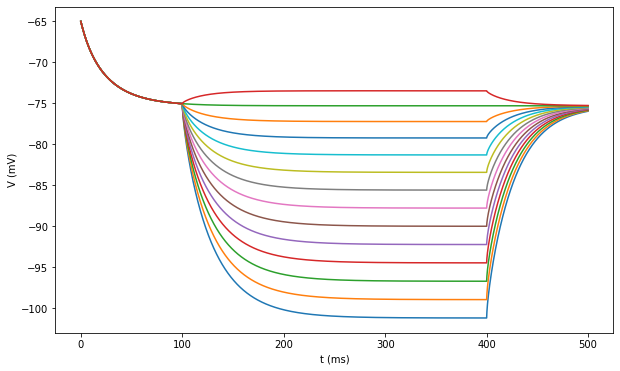

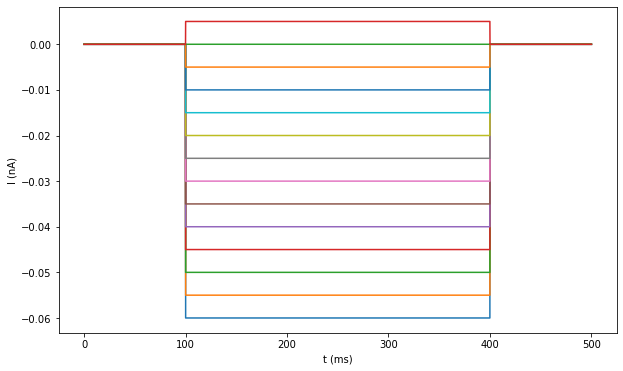

In [6]:
# Protocol 1

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_1_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

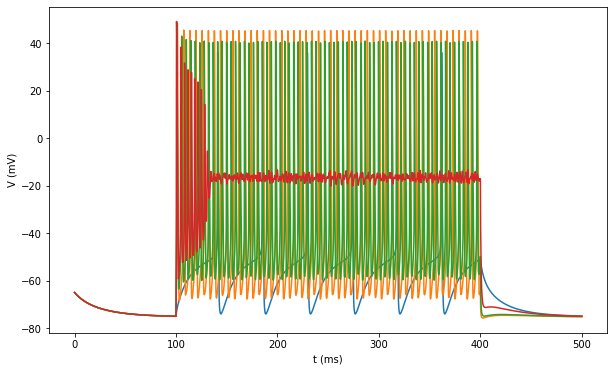

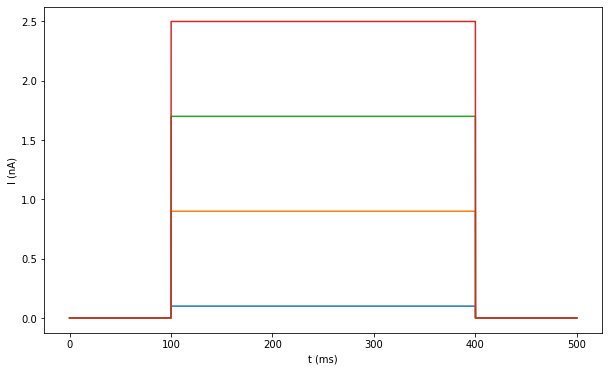

In [11]:
# Protocol 2

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_2_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

## 2.  For Cell2_g1

<font size='3'><font color='red'> RESTART YOUR KERNEL!

In [1]:
! nrnivmodl

/home/In Silico/Week 5/Homework
NaTs2_t.mod SK_E2.mod SKv3_1.mod
NaTs2_t.mod SK_E2.mod SKv3_1.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  NaTs2_t.lo SK_E2.lo SKv3_1.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libnrnmech.so .libs/libnrnmech.so.0 .libs/libnrnmech.so.0.0.0
libtool: link: gcc -shared  -fPIC -DPIC  .libs

In [2]:
# Load usefull packages
%matplotlib inline

from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer

In [3]:
# Import cell morphologies

# Define NEURON class with specific morphology and channel behavior

class NEURON_Ex1:
    def __init__(self, morph_path):
        self.build_morphology(morph_path)
        self.define_biophysics()
        
    def build_morphology(self, morph_path):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input(morph_path)

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

                # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
                #seg.gNaTs2_tbar_NaTs2_t = 0.5 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [4]:
# Instantiate the cell and giving passive and active properties
Cell2_g1 = NEURON_Ex1('Cell2_g1.asc')


19847 lines read


In [5]:
# Defining the protocol 
protocol_1_amp = np.arange(-0.06, 0.01, 0.005)
protocol_2_amp = np.arange(0.1, 3, 0.8)

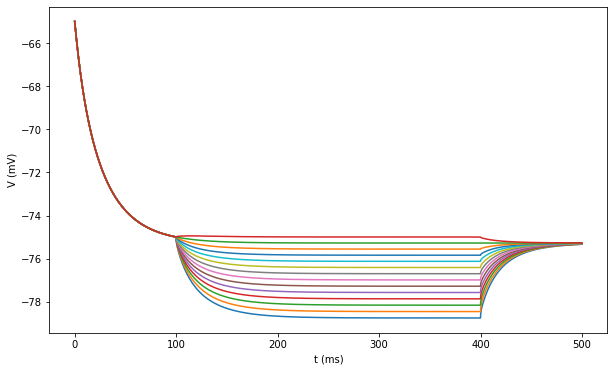

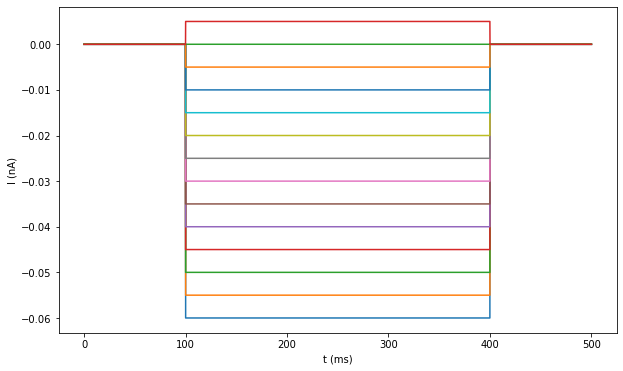

In [6]:
# Protocol 1

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_1_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

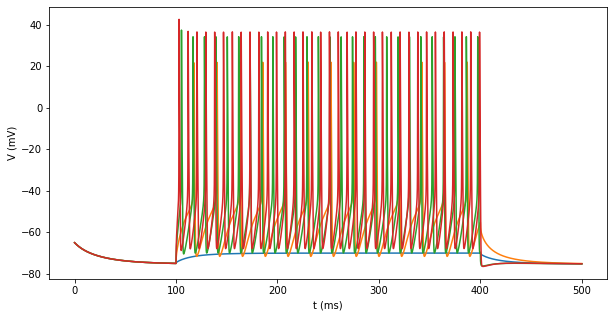

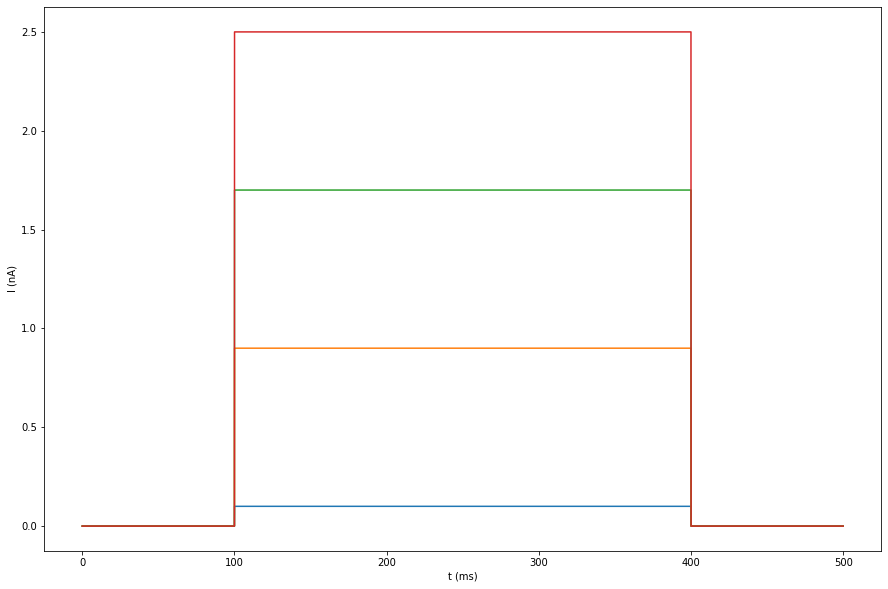

In [7]:
# Protocol 2

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

#protocol_crazy = np.arange(1, 10, 1)

# Stimulation
for amp in protocol_2_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

#### --> What protocols could be used to study cells at the single-cell level ?

In order to study cells at a single-cell level, one can pay attention to various aspects: a neuron's morphology, electrophysiology and genetic/molecular level.

In this particular exercise, we focusing on the electrophysiology properties of such cells.  On a single-cell level, what is most often done consists in patch-clamp experiments.  These can be voltage-clamped or current-clamped experiments, where either the membrane voltage is fixed and one looks at the flow of current, or the current is fixed and one focuses on the membrane potential evolution.

The voltage-clamped mode is used to measure voltage specific activity of an ionic channel, whereas the current-clamped mode measures change in membrane potential.

In order to take a closer look at the electric behavior of a neuron, one can perform different types of current-clamps protocols: short pulse impulse, step current, and ramp.  These different different types of current injection produce different types of behavior in the cell: indeed if the current is progressively injected and for smaller amplitudes, the cell remains in a sub-threshold behavior and thus does not fire any action potential.  On the other hand, if the injected current is stronger, the cell may cross the action potential threshold and fire action potentials, and can even enter a state of repetitive action potential firing.

Other protocols exist, as mentionned in the article ["Single Cell Electrical Characterization Techniques"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4490468/):
- Nanoprobe
- Microfluidics Platforms (lithography)
- Electrorotation
- Impedance Flow Cytometry
- Micro Electrical Impedance Spectroscopy (µ-EIS)


#### --> Do you think protocols 1 and 2 are a good choice for characterising both passive and active properties of your cells, why or why not ? Explain.



Protocol 1 seeks to inject current from -0,06 to 0,01 nA.  This small amplitude of injected current allows the cell to remain in a subthreshold behavior and not fire any action potential.  This protocol is useful in the sense that it allows us to remain in the subthreshold behavior and thus analyze the passive membrane properties.  Indeed, when injecting small currents, one can for example directly measure the $\tau$ time scale and the input resistance ($\frac{\Delta u}{\Delta I} = input\_resistance$). 

One can note in the plots above the exponential decrease when the protocol 1 currents are injected. Moreover, the inital decrease is due to the fact that the starting potential of the stimulation is at -65 mV, while the resting membrane potential is set at -75 in the NEURON_EX1 class (and we see for both protocol 1 and 2 that the membrane returns to this resting state after stimulation).

On the other hand, protocol 2 fires currents of higher amplitude (from 0.1 up to 3 nA).  This protocol enables the cell to enter into a supra-threshold behavior and fire action potentials.  Depending on the current injected it can also enter into a repetitive firing rate.  This type of protocol is efficient to study the active properties of the cell, and note different features such as the action potential amplitude, the action potential width, the firing frequency, the inter-spike interval, the refractory period, if it is an adaptive neuron...

However, one could also increase the range of amplitudes of the injected currents for Cell2_g1.  Indeed, by creating a new protocol (protocol_crazy) with amplitudes which reach 10 nA, we also noticed that Cell2_g1 reaches this maximal firing frequency and exhibits a decrease of action potential spiking. (see cell below for code)

Moreover, one can notice for Cell1_g1, that when the current injected leads to firing beyond the maximal firing frequency, it is evident that the action potential firing decreases exponentially in amplitude.  According to [this article's method section](https://www.frontiersin.org/articles/10.3389/fncel.2016.00239/full), this phenomenon was observed when injecting incremental depolarizing current steps, as we have done above.  Indeed, it could be that all of the sodium channels have opened and deactivated, leading to repetitive action potential firing which fluctuates around -20mV (more depolarized than the resting potential).  This could be due to the fact that there are more sodium ions inside the cell, and this neuron has a longer refractory period.

We also tried to increase the active properties of the soma of Cell1_g1: we set the transient sodium channel's (NaTs2_t) conductance to 1.  With this increase of sodium conductance, we notice that the cell doesn't reach a decrease in action potential firing as fast as it had with lower conductance.  When injecting current (around 1.75 nA, the green line), it used to show a decrease in action potential with a conductance of 0.25, and no longer with a conductance of 1.

###### Getting Cell2_g1 beyond maximal AP firing

In [ ]:
# Protocol 2

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

protocol_crazy = np.arange(1, 10, 1)

# Stimulation
for amp in protocol_crazy:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

###### Increasing the conductance of Cell1_g1 to 1

In [ ]:
# Import cell morphologies

# Define NEURON class with specific morphology and channel behavior

class NEURON_Ex1:
    def __init__(self, morph_path):
        self.build_morphology(morph_path)
        self.define_biophysics()
        
    def build_morphology(self, morph_path):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input(morph_path)

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

                # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                #seg.gNaTs2_tbar_NaTs2_t = 0.25 
                seg.gNaTs2_tbar_NaTs2_t = 1 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [ ]:
# Protocol 2

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_2_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

# Ex 2. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the time to first spike, spikecount and the coefficient of variation of the interspike interval (ISI) from the recordings in your folder group (.dat files). Plot all recordings, then extract the above features from one or several stimulation protocols that you think you can extract the features from using your method of choice - eFEL, scipy.signal or your own custom code. [1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").

####  --> Find the time to first spike, spikecount and the coefficient of variation of the interspike interval (ISI) from the recordings in your folder group

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, peak_prominences
from mpl_toolkits.axes_grid1 import make_axes_locatable
from json2html import *
import IPython

In [7]:
def zip_traces(traces_path):
    """Save traces that are paired in zip format by iterating through the directory's files (.dat)
    then separate ch6 and ch7 to zip them at the end"""
    ch6_list = []
    ch7_list = []
    for filename in os.listdir(traces_path):
        if filename.lower().endswith('.dat'):
            trace_name = os.path.basename(filename)
            channel_name = trace_name.rsplit('_', 2)[1]
            # Putting file in folder whether it contains ch6 or ch7
            if channel_name == 'ch6':
                ch6_list.append(trace_name)
            else:
                ch7_list.append(trace_name)
    # Sorting the lists so we can match the correct files together
    ch6_list.sort()
    ch7_list.sort()
    return set(zip(ch6_list, ch7_list))

def get_data(fn):
    """Read  data file and formatfor plotting"""
    fn = os.path.join('Group_1', fn)
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

def plot_traces(fig, paired_traces):
    """Plot all traces by creating subplots and dividing each subplot to 
    voltage and current responses respectively"""
    for idx, trace in enumerate(paired_traces):
        axes = fig.add_subplot(10, 2, idx+1)
        divider = make_axes_locatable(axes)
        ax_voltage = divider.append_axes("top", size="100%", pad=0.1, sharex=axes)
        t, v = get_data(trace[0])
        t, i = get_data(trace[1])
        ax_voltage.plot(t, v)
        ax_voltage.set_ylabel('Voltage (mV)')
        ax_voltage.xaxis.set_tick_params(labelbottom=False)
        axes.plot(t, i, color='red')
        axes.set_ylabel('Current (nA)')
        axes.set_xlabel('Time (msec)')
        ax_voltage.set_title(str(trace[0]))
    fig.tight_layout()
        
def extract_features(paired_traces):
    """Extract the mentioned features (First peak time, spike counts and cv of ISI) 
    from the recordings that have spikes"""
    first_peak_time = []
    spike_counts = []
    cv_isi = []
    idx_selected_rec = []
    for i, trace in enumerate(paired_traces):
        t, v = get_data(trace[0])
        peaks_time, _ = find_peaks(v, prominence=1, height=-20)
        if len(peaks_time) > 1:
            first_peak_time.append((trace[0], peaks_time[0]))
            spike_counts.append((trace[0], len(peaks_time)))
            #cv_isi.append((trace[0], np.diff(peaks_time).std()*100/np.diff(peaks_time).mean()))
            cv_isi.append((trace[0], np.diff(peaks_time).std()/np.diff(peaks_time).mean()))
            idx_selected_rec.append(i)
    return first_peak_time, spike_counts, cv_isi, idx_selected_rec

In [8]:
#Acquire traces and zip the paired ones together (38 pairs)
traces_path = 'Group_1'
paired_traces = zip_traces(traces_path)

####  --> Plot all recordings

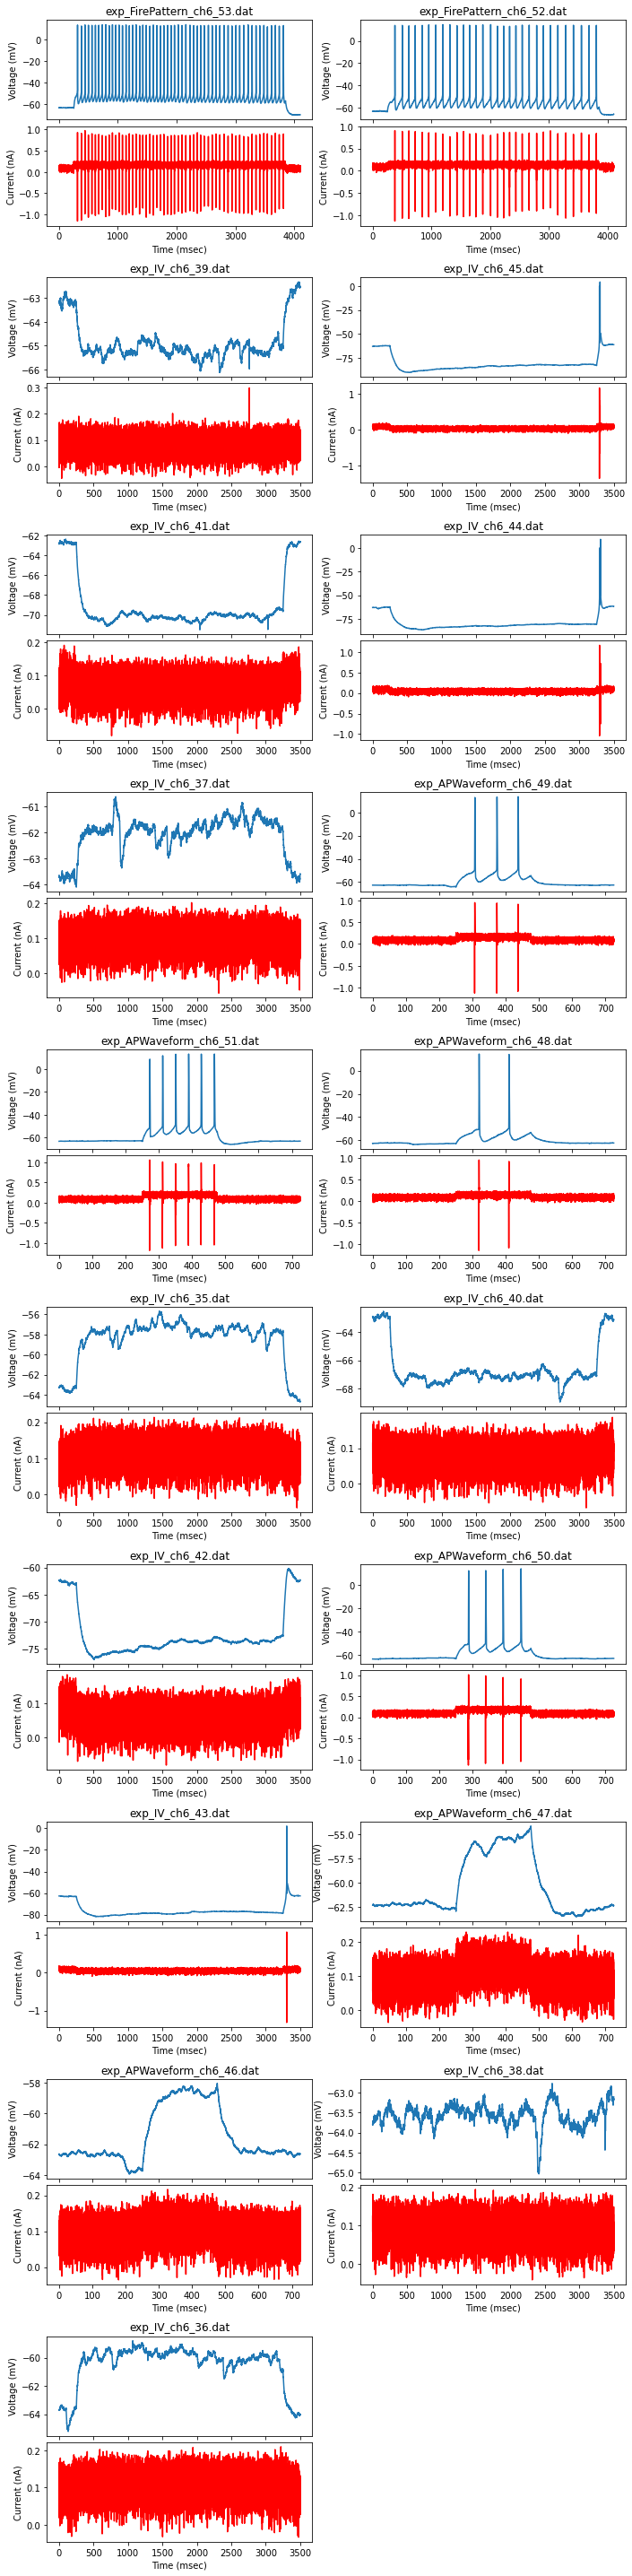

In [9]:
#Plot all traces
fig = plt.figure(figsize=(10, 40))
plot_traces(fig, paired_traces)

####  --> Extract the above features from one or several stimulation protocols that you think you can extract the features from

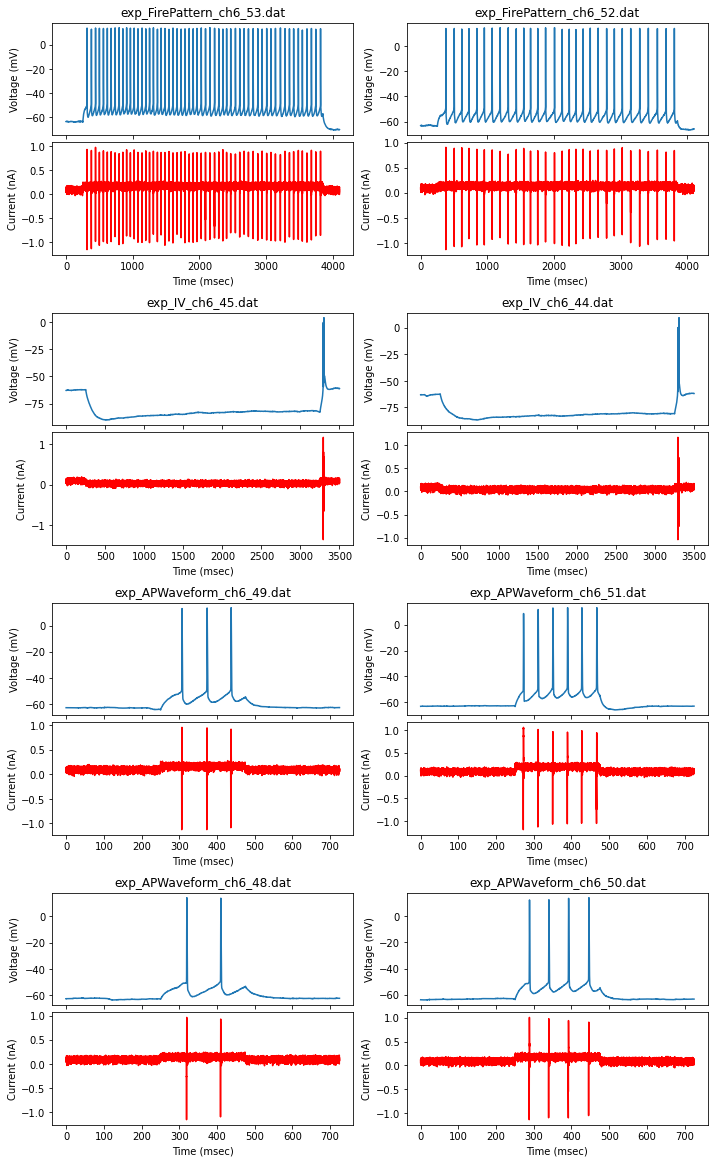

In [10]:
#Extract features from selected recordings (Recordings that have spikes [len(peaks_time) > 1])
first_peak_time, spike_counts, cv_isi, idx_selected_rec = extract_features(paired_traces)

#Plot the selected recordings with their features values
selected_traces = []
for i, trace in enumerate(paired_traces):
    if i in idx_selected_rec:
        selected_traces.append(trace)
fig = plt.figure(figsize=(10, 40))
plot_traces(fig, selected_traces)

In [11]:
#Print the features values for the selected recordings (plotted above) in tablular format.
feature_values = {}
for i, trace in enumerate(first_peak_time):
    feature_values[str(trace[0])] = {'Time of First Peak': first_peak_time[i][1],
                 'Spike Count': spike_counts[i][1],
                 'CV for ISI': cv_isi[i][1]}
IPython.display.HTML(json2html.convert(json=feature_values))

# Ex 3. Combine Ex 1 and Ex 2

<font size='3'> Now let's do some electrophysiological analysis on both cells from your group folder that you have used in exercise 1. Examine your plots for protocols 1 and 2 (from exercise 1 again) and select 2 or 3 eFeatures to help you identify differences between your two cells. Would you be able to classify the cells based on these eFeatures ? Explain your choice of features and your observations. [1.5 pts]


####  --> Examine your plots for protocols 1 and 2 (from exercise 1 again) and select 2 or 3 eFeatures to help you identify differences between your two cells

When taking a look at the eFEL documentation, several eFeatures stand out and prove useful to classify our cells from the two protocols implemented in exercise 1.

For protocol 1 where the cell remains in subthreshold activity, interesting features to take a look at would be:
- voltage deflection
- decay time constant after stimulation
- ohmic_input_resistance

As for protocol 2 where the cell enters supra-threshold activity, the interesting features to take a look at would be:
- mean frequency
- coefficient of variation of ISI
- decay time constant
- time to first spike
- checking the AP initiation with AIS
- burst number
- the width of a spike at half-width amplitude, or the width of the spike at threshold

When looking at both of our cells however, we can narrow down our eFeatures to 2-3 to identify the differences between our two cells:
- ohmic_input_resistance
- AHP depth
- mean frequency

Indeed, when looking at the respective plots, we notice for the subthreshold behavior (protocol 1), Cell1_g1 and Cell2_g1 exhibit different behaviors.  This difference can be identified by computing the ohmic_input_resistance.  When looking at the plots related to supra-threshold firing behavior, one can also notice that the hyperpolarization depths differ between these two cells: therefore, looking at the AHP depth could help contribute to distinguishing these two cells.  Lastly, the third feature we would select would be the mean firing frequency, as for the same injected current amplitudes, both cell exhibit different firing frequencies.  Many additional features could help us distinguish these two cells, as for example spike height...  Please find below the values for both cells regarding the mentionned features.

####  --> Obtaining eFeatures for Cell1_g1

<font size='3'><font color='red'> RESTART YOUR KERNEL!

In [18]:
# Obtaining eFeatures by doing code similar to exercise 2



####  --> Obtaining eFeatures for Cell1_g1

<font size='3'><font color='red'> RESTART YOUR KERNEL!

In [ ]:
# Obtaining eFeatures by doing code similar to exercise 2



####  --> Would you be able to classify the cells based on these eFeatures?

With these eFeatures, we're able to distinguish Cell1_g1 from Cell2_g1.  Indeed, they show different values which indicates that they are not the same cell.

One could resort to using the Petilla classification to try to place these two cells according to their characteristics.  However, one must note that the classification is not as clear-cut.  Indeed, these two cells could belong to the extremes of a gradient of a same cell class.  To be able to classify them more precisely, one should resort to experimenting more in order to place these two cells correctly into clusters.

# Ex 4. Genetic Algorithm (Optimization)

<font size='3'><font color='green'> [Old Exercise Values]Change the GA code in such a way that instead of spike count, we search for a solution for time from the start of the stimulus to the maximum of the first peak using stim_amp = 0.1 nA and stim_amp = 0.9 nA.

<font size='3'><font color='green'>As you can see the optimization algorithm explained in the tutorial is too simple and it gives a lot of possible solutions. Find a third data point for time_to_first_spike and rerun the GA algorithm now using 3 instead of 2 goals. Does this help improve your results ? Explain what other modifications you could introduce, so the number of solutions gets better constrained. [2 pts]
    
<font size='3'> Change the GA code in such a way that instead of spike count, we search for a solution for time from the start of the stimulus to the maximum of the first peak of 1.99 ms with stim_amp = 0.1 nA and 0.89 ms for stim_amp = 0.5 nA.

<font size='3'>As you can see the optimization algorithm explained in the tutorial is too simple and it gives a lot of possible solutions. Use a third data point (time_to_first_spike of 0.59 ms for stum_amp = 1.1 nA) and rerun the GA algorithm now using 3 instead of 2 goals. Does this help improve your results ? Explain what other modifications you could introduce, so the number of solutions gets better constrained. [2 pts]

    

### 1.1. Parameters to optimize

Obtaining the values from our cell, in order to have datapoints to input when running our GA

In [1]:
# Inject current steps into the soma
stim_amp = [0.1, 0.5] # nA

In [2]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h
import efel
import random

In [3]:
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))

# Geometry (frozen parameters)
soma.L = soma.diam = 12.6157 # µm
dend.L = 200                 # µm
dend.diam = 1                # µm
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm (frozen)
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2 (frozen)

# Insert active Hodgkin-Huxley current in the soma
soma.insert('hh')
for seg in soma:
    seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1] (NOT frozen)
    seg.hh.gkbar = 0.1    # Potassium conductance in S/cm2. [0, 1] (NOT frozen)
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2 (fix)
    seg.hh.el = -54.3     # Reversal potential in mV (fix)

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2 (frozen)
    seg.pas.e = -65    # Leak reversal potential mV (frozen)

Amplitude of current injected: 0.1
Time to first spike: 1.8999999999984851
Amplitude of current injected: 0.5
Time to first spike: 0.7999999999985477


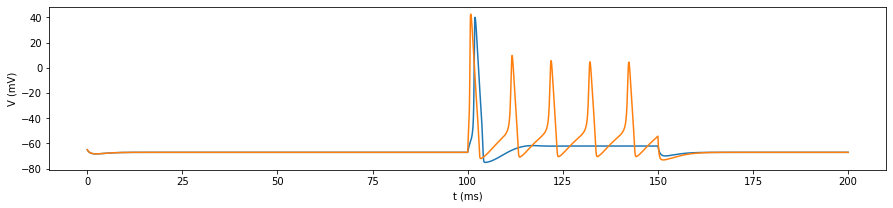

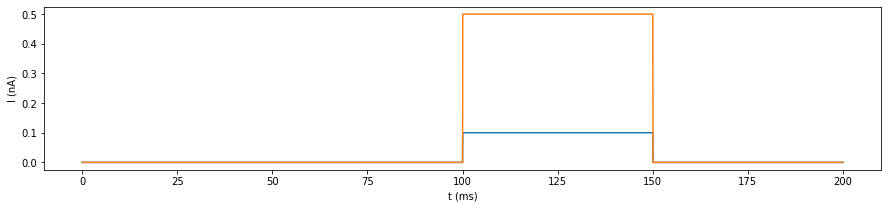

In [4]:
# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

feature_value_list = []

# Stimulation
for sa in stim_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50      # stim duration (ms)
    stim.amp = sa      # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [150]}

    feature_values = efel.getFeatureValues([trace], ['time_to_first_spike'])[0]
    
    print('Amplitude of current injected: '+str(sa))
    print('Time to first spike: '+str(feature_values['time_to_first_spike'][0]))
    
    feature_value_list.append(feature_values['time_to_first_spike'][0])

    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

### 1.2. Optimization of cell conductances through genetic algorithm

<font size='3'><font color='red'> RESTART YOUR KERNEL!

In [5]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
from neuron import h

import random
import numpy as np
import efel

In [6]:
# Cretae ball and stick model
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

In [7]:
# Create a function of the simulation that will give us the result for the different population members
def stimulation(amp):
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [150]}

    feature_values = efel.getFeatureValues([trace], ['time_to_first_spike'])[0]
    
    return feature_values


def create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size):
    # Set up an initial array of all zeros
    population = np.zeros((pop_size, 2))
    for p in range(pop_size):
        gna = random.uniform(gna_min, gna_max)
        gk = random.uniform(gk_min, gk_max)
        population[p][0] = gna
        population[p][1] = gk
    return population

def calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2):
    scores = []
    for pop in population:
        gna = pop[0]
        gk = pop[1]
        # Introduce mechanisms in the ball and stick model
        soma.insert('hh')
        for seg in soma:
            seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
            seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]
        fits = []
        for g, st in zip([goal1, goal2], [stim_amp1, stim_amp2]):
            feature_values = stimulation(st) # 0.5 is the amplitud stimulation
            if feature_values['time_to_first_spike']:
                value = feature_values['time_to_first_spike'][0]
                fit = np.abs(g - value)
            else:
                fit = 1000000000000 # Strongly penalizing if there is no spike, so we avoid this scenario
            fits.append(fit)
        scores.append(np.mean(fits))
    return scores

def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify individual with smallest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return winner
    return population[winner, :]

def breed_by_crossover(parent_1, parent_2):
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0],parent_2[1]))  
    child_2 = np.hstack((parent_1[1],parent_2[0]))    
    # Return children
    return child_1, child_2

def randomly_mutate_population(population, mutation_probability):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            # Apply random mutation
            gna = random.uniform(0, 1)
            p[0] = gna
            gk = random.uniform(0, 1)
            p[1] = gk
        else:
            pass
    # Return mutation population
    return population

Starting best score: 0.050000 (gna = 0.56, gk = 0.22)
Starting best score: 0.050000 (gna = 0.12, gk = 0.03)
Starting best score: 0.050000 (gna = 0.19, gk = 0.07)
Generation 0 best score: 0.000000 (gna = 0.3430, gk = 0.1543)
Generation 0 best score: 0.000000 (gna = 0.3120, gk = 0.1220)
Generation 1 best score: 0.000000 (gna = 0.5507, gk = 0.2642)
Generation 1 best score: 0.000000 (gna = 0.3430, gk = 0.1543)
Generation 2 best score: 0.050000 (gna = 0.7049, gk = 0.3430)
Generation 2 best score: 0.050000 (gna = 0.1543, gk = 0.0286)
Generation 3 best score: 0.050000 (gna = 0.1543, gk = 0.0286)
Generation 3 best score: 0.050000 (gna = 0.7049, gk = 0.3430)
Generation 4 best score: 0.000000 (gna = 0.3187, gk = 0.1292)
Generation 4 best score: 0.000000 (gna = 0.3430, gk = 0.1543)


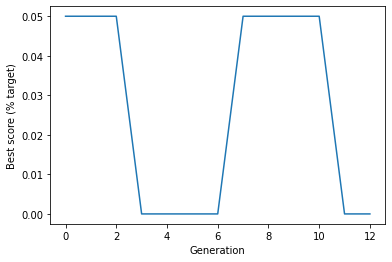

In [9]:
# Set general parameters
population_size = 50
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.8999999999984851 
stim_amp2 = 0.9 # nA
goal2 = 0.599999999998559 

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

We note that with the amplitudes we inject above, we don't necessarily obtain a spike every single time.  As a result, given the random starting point, we sometimes obtain an error indicating this lack of spike, given that we cannot compute the time to the first spike.  However, when modifying our GA fitness function, we took this into account: if the cell did not spike and therefore the eFEL library could not generate a time to first spike, we penalized the fitness by setting it to a very large value.


In this case, we notice that even starting with generation 1 we obtain a score close to 0.  This indicates that there exist a wide variety of solutions which are adequate for the problem we are trying to optimize.

### 2.1. Parameters to optimize for 3 data points

<font size='5'><font color='red'>RESTART YOUR KERNEL
    
Here we are using 3 datapoints, hoping to constrain more our problem and therefore obtain solutions which minimize the fitness AND are close to the theoretical values we are hoping to near.

In [1]:
# Inject current steps into the soma
stim_amp = [0.1, 0.5, 1.1] # nA

In [2]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h
import efel
import random

In [3]:
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

Amplitude of current injected: 0.1
Time to first spike: 1.9999999999984794
Amplitude of current injected: 0.5
Time to first spike: 0.899999999998542
Amplitude of current injected: 1.1
Time to first spike: 0.599999999998559


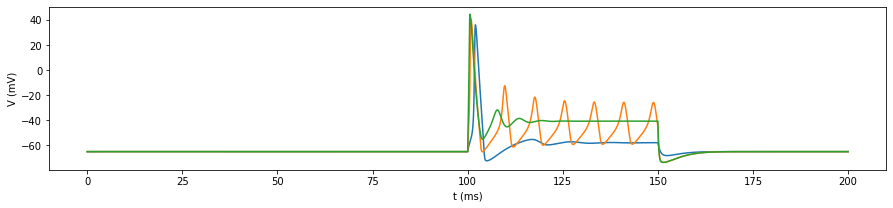

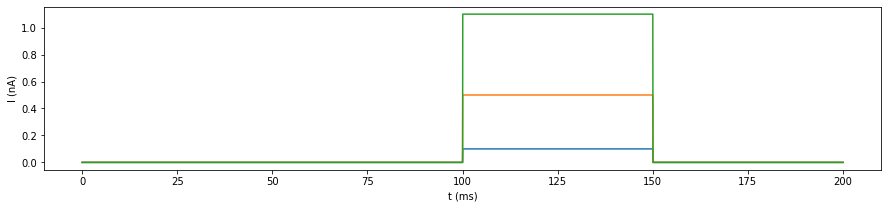

In [4]:
# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

feature_value_list = []

# Stimulation
for sa in stim_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50      # stim duration (ms)
    stim.amp = sa      # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [150]}

    feature_values = efel.getFeatureValues([trace], ['time_to_first_spike'])[0]
    
    print('Amplitude of current injected: '+str(sa))
    print('Time to first spike: '+str(feature_values['time_to_first_spike'][0]))
    
    feature_value_list.append(feature_values['time_to_first_spike'][0])

    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

### 2.1. Optimization of cell conductances through genetic algorithm

<font size='3'><font color='red'>RESTART YOUR KERNEL

In [1]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
from neuron import h

import random
import numpy as np
import efel

In [2]:
# Create ball and stick model
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

In [3]:
# Create a function of the simulation that will give us the result for the different population members
def stimulation(amp):
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [150]}

    feature_values = efel.getFeatureValues([trace], ['time_to_first_spike'])[0]
    
    return feature_values


def create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size):
    # Set up an initial array of all zeros
    population = np.zeros((pop_size, 2))
    for p in range(pop_size):
        gna = random.uniform(gna_min, gna_max)
        gk = random.uniform(gk_min, gk_max)
        population[p][0] = gna
        population[p][1] = gk
    return population

def calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3):
    scores = []
    for pop in population:
        gna = pop[0]
        gk = pop[1]
        # Introduce mechanisms in the ball and stick model
        soma.insert('hh')
        for seg in soma:
            seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
            seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]
        fits = []
        for g, st in zip([goal1, goal2, goal3], [stim_amp1, stim_amp2, stim_amp3]):
            feature_values = stimulation(st) # 0.5 is the amplitud stimulation
            if feature_values['time_to_first_spike']:
                value = feature_values['time_to_first_spike'][0]
                fit = np.abs(g - value)
            else:
                fit = 1000000000000 # Strongly penalizing if there is no spike, so we avoid this scenario
            fits.append(fit)
        scores.append(np.mean(fits))
    return scores

def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify individual with smallest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return winner
    return population[winner, :]

def breed_by_crossover(parent_1, parent_2):
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0],parent_2[1]))  
    child_2 = np.hstack((parent_1[1],parent_2[0]))    
    # Return children
    return child_1, child_2

def randomly_mutate_population(population, mutation_probability):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            # Apply random mutation
            gna = random.uniform(0, 1)
            p[0] = gna
            gk = random.uniform(0, 1)
            p[1] = gk
        else:
            pass
    # Return mutation population
    return population

Starting best score: 0.066667 (gna = 0.20, gk = 0.10)
Generation 0 best score: 0.066667 (gna = 0.2819, gk = 0.1293)
Generation 1 best score: 0.100000 (gna = 0.1803, gk = 0.0382)
Generation 2 best score: 0.133333 (gna = 0.8904, gk = 0.5037)
Generation 3 best score: 0.100000 (gna = 0.3814, gk = 0.2021)
Generation 4 best score: 0.100000 (gna = 0.3814, gk = 0.2052)
Generation 4 best score: 0.100000 (gna = 0.5269, gk = 0.2906)


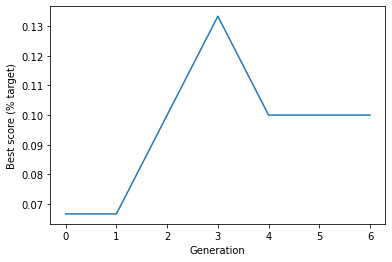

In [9]:
# Set general parameters
population_size = 50
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.9999999999984794
stim_amp2 = 0.5 # nA
goal2 = 0.899999999998542
stim_amp3 = 1.1 # nA
goal3 = 0.599999999998559

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

#### --> Does this help improve your results ? Explain what other modifications you could introduce, so the number of solutions gets better constrained

This third datapoint helps improve our results.  Indeed, adding this third datapoint constrains more our problem, and as the GA evolves, it doesn't easily encounter a large number of correct solutions.  Indeed, while we had obtained a score of zero in the first case, the final individual had sodium and potassium channel conductances which were considerably distinct from the target ones, and they varied more strongly from one generation to the other.  However when introducing this third datapoint, this constrained the problem more and enabled the genetic algorithm to evolve slower towards more stable conductances.

Despite constraining the evolution from one generation to the next of conductances, this GA still doesn't improve our results considerably, given that it does not approach the target conductances.

Here are other modifications which we introduced and analyzed their effect afterwards to see if the number of solutions get better constrained:

#### --> Idea 1: Starting the initial population around the target values

Starting best score: 0.033333 (gna = 0.25, gk = 0.10)
Starting best score: 0.033333 (gna = 0.24, gk = 0.10)
Starting best score: 0.033333 (gna = 0.21, gk = 0.09)
Generation 0 best score: 0.033333 (gna = 0.2521, gk = 0.1194)
Generation 0 best score: 0.033333 (gna = 0.2319, gk = 0.1031)
Generation 0 best score: 0.033333 (gna = 0.2095, gk = 0.0817)
Generation 1 best score: 0.033333 (gna = 0.2168, gk = 0.0945)
Generation 1 best score: 0.033333 (gna = 0.2319, gk = 0.0967)
Generation 1 best score: 0.033333 (gna = 0.2168, gk = 0.0909)
Generation 2 best score: 0.033333 (gna = 0.2521, gk = 0.1190)
Generation 2 best score: 0.033333 (gna = 0.2564, gk = 0.1194)
Generation 2 best score: 0.033333 (gna = 0.2534, gk = 0.1194)
Generation 2 best score: 0.033333 (gna = 0.2167, gk = 0.0863)
Generation 3 best score: 0.033333 (gna = 0.2521, gk = 0.1194)
Generation 4 best score: 0.033333 (gna = 0.2534, gk = 0.1194)
Generation 4 best score: 0.033333 (gna = 0.2597, gk = 0.1190)
Generation 4 best score: 0.03333

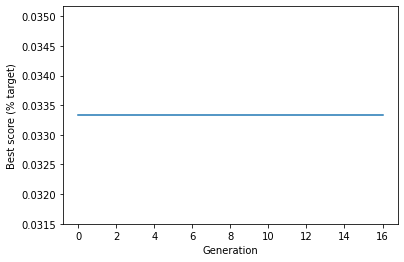

In [11]:
# Set general parameters
population_size = 50
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.9999999999984794
stim_amp2 = 0.5 # nA
goal2 = 0.899999999998542
stim_amp3 = 1.1 # nA
goal3 = 0.599999999998559

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)
population = create_starting_population(0.20, 0.30, 0.05, 0.15, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

#### --> Idea 2: Starting with a bigger initial population

Starting best score: 0.090000 (gna = 0.39, gk = 0.18)
Generation 0 best score: 0.063333 (gna = 0.4901, gk = 0.2567)
Generation 1 best score: 0.063333 (gna = 0.2834, gk = 0.1252)
Generation 1 best score: 0.063333 (gna = 0.3215, gk = 0.1572)
Generation 2 best score: 0.063333 (gna = 0.3496, gk = 0.1672)
Generation 3 best score: 0.096667 (gna = 0.3583, gk = 0.2015)
Generation 4 best score: 0.090000 (gna = 0.2567, gk = 0.0925)


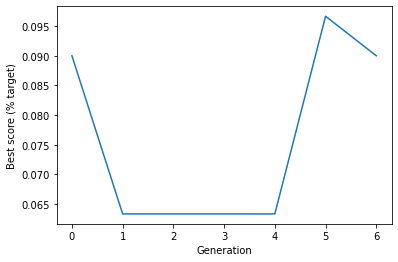

In [14]:
# Set general parameters
population_size = 100
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.9999999999984794
stim_amp2 = 0.5 # nA
goal2 = 0.899999999998542
stim_amp3 = 1.1 # nA
goal3 = 0.599999999998559

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

#### --> Idea 3: Increasing the number of generations

Starting best score: 0.066667 (gna = 0.37, gk = 0.18)
Generation 0 best score: 0.100000 (gna = 0.3620, gk = 0.1536)
Generation 0 best score: 0.100000 (gna = 0.9410, gk = 0.4809)
Generation 1 best score: 0.100000 (gna = 0.6147, gk = 0.3121)
Generation 1 best score: 0.100000 (gna = 0.5378, gk = 0.3028)
Generation 2 best score: 0.100000 (gna = 0.5237, gk = 0.3028)
Generation 2 best score: 0.100000 (gna = 0.9248, gk = 0.4809)
Generation 3 best score: 0.100000 (gna = 0.5861, gk = 0.3121)
Generation 3 best score: 0.100000 (gna = 0.9248, gk = 0.4922)
Generation 3 best score: 0.100000 (gna = 0.6328, gk = 0.3270)
Generation 4 best score: 0.033333 (gna = 0.1291, gk = 0.0267)
Generation 5 best score: 0.100000 (gna = 0.9410, gk = 0.4922)
Generation 6 best score: 0.133333 (gna = 0.9248, gk = 0.5150)
Generation 6 best score: 0.133333 (gna = 0.9410, gk = 0.5150)
Generation 7 best score: 0.200000 (gna = 0.7816, gk = 0.3028)
Generation 7 best score: 0.200000 (gna = 0.7816, gk = 0.3028)
Generation 8 bes

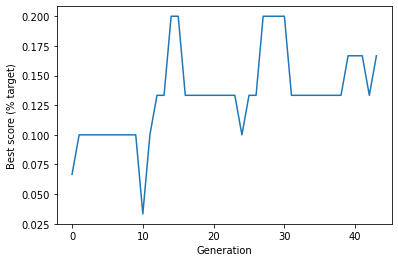

In [16]:
# Set general parameters
population_size = 50
maximum_generation = 20
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.9999999999984794
stim_amp2 = 0.5 # nA
goal2 = 0.899999999998542
stim_amp3 = 1.1 # nA
goal3 = 0.599999999998559

# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

#### --> Idea 4: Increasing the number of datapoints introduced to better constrain our problem

<font size='3'><font color='red'>RESTART YOUR KERNEL

In [7]:
# Finding our datapoints

Amplitude of current injected: 0.1
Time to first spike: 1.9999999999984794
Amplitude of current injected: 0.3
Time to first spike: 1.0999999999985306
Amplitude of current injected: 0.5
Time to first spike: 0.899999999998542
Amplitude of current injected: 0.9
Time to first spike: 0.6999999999985533
Amplitude of current injected: 1.1
Time to first spike: 0.599999999998559
Amplitude of current injected: 1.6
Time to first spike: 0.4999999999985647


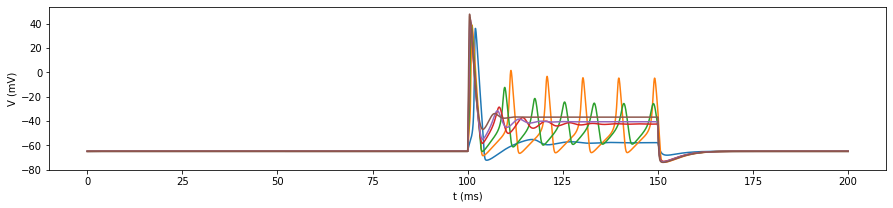

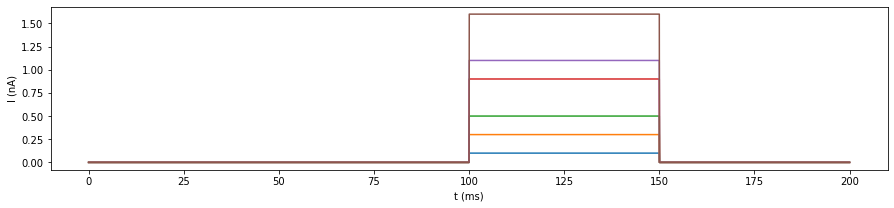

In [8]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h
import efel
import random

# Inject current steps into the soma
stim_amp = [0.1, 0.3, 0.5, 0.9, 1.1, 1.6] # nA

# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV
    
# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

feature_value_list = []

# Stimulation
for sa in stim_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50      # stim duration (ms)
    stim.amp = sa      # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [150]}

    feature_values = efel.getFeatureValues([trace], ['time_to_first_spike'])[0]
    
    print('Amplitude of current injected: '+str(sa))
    print('Time to first spike: '+str(feature_values['time_to_first_spike'][0]))
    
    feature_value_list.append(feature_values['time_to_first_spike'][0])

    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

In [9]:
# Running our GA with 6 datapoints

<font size='3'><font color='red'>RESTART YOUR KERNEL

In [1]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
from neuron import h

import random
import numpy as np
import efel

# Create ball and stick model
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV
    
    
# Create a function of the simulation that will give us the result for the different population members
def stimulation(amp):
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [150]}

    feature_values = efel.getFeatureValues([trace], ['time_to_first_spike'])[0]
    
    return feature_values


def create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size):
    # Set up an initial array of all zeros
    population = np.zeros((pop_size, 2))
    for p in range(pop_size):
        gna = random.uniform(gna_min, gna_max)
        gk = random.uniform(gk_min, gk_max)
        population[p][0] = gna
        population[p][1] = gk
    return population

def calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3, goal4, stim_amp4, goal5, stim_amp5, goal6, stim_amp6):
    scores = []
    for pop in population:
        gna = pop[0]
        gk = pop[1]
        # Introduce mechanisms in the ball and stick model
        soma.insert('hh')
        for seg in soma:
            seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
            seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]
        fits = []
        for g, st in zip([goal1, goal2, goal3, goal4, goal5, goal6], [stim_amp1, stim_amp2, stim_amp3, stim_amp4, stim_amp5, stim_amp6]):
            feature_values = stimulation(st) # 0.5 is the amplitud stimulation
            if feature_values['time_to_first_spike']:
                value = feature_values['time_to_first_spike'][0]
                fit = np.abs(g - value)
            else:
                fit = 1000000000000 # Strongly penalizing if there is no spike, so we avoid this scenario
            fits.append(fit)
        scores.append(np.mean(fits))
    return scores

def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify individual with smallest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return winner
    return population[winner, :]

def breed_by_crossover(parent_1, parent_2):
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0],parent_2[1]))  
    child_2 = np.hstack((parent_1[1],parent_2[0]))    
    # Return children
    return child_1, child_2

def randomly_mutate_population(population, mutation_probability):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            # Apply random mutation
            gna = random.uniform(0, 1)
            p[0] = gna
            gk = random.uniform(0, 1)
            p[1] = gk
        else:
            pass
    # Return mutation population
    return population

Starting best score: 0.016667 (gna = 0.14, gk = 0.06)
Generation 0 best score: 0.100000 (gna = 0.3504, gk = 0.1448)
Generation 0 best score: 0.100000 (gna = 0.2043, gk = 0.0476)
Generation 0 best score: 0.100000 (gna = 0.5136, gk = 0.2795)
Generation 1 best score: 0.016667 (gna = 0.1391, gk = 0.0587)
Generation 2 best score: 0.050000 (gna = 0.2588, gk = 0.1391)
Generation 3 best score: 0.100000 (gna = 0.3295, gk = 0.1490)
Generation 3 best score: 0.100000 (gna = 0.4326, gk = 0.2043)
Generation 3 best score: 0.100000 (gna = 0.2950, gk = 0.1804)
Generation 4 best score: 0.100000 (gna = 0.3926, gk = 0.1804)
Generation 4 best score: 0.100000 (gna = 0.4146, gk = 0.1804)


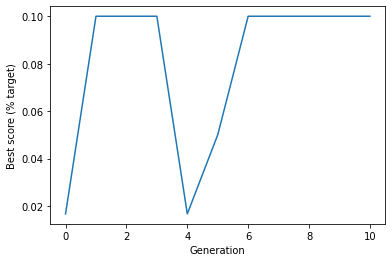

In [3]:
# Set general parameters
population_size = 50
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.9999999999984794
stim_amp2 = 0.3 # nA
goal2 = 1.0999999999985306
stim_amp3 = 0.5 # nA
goal3 = 0.899999999998542
stim_amp4 = 0.9 # nA
goal4 = 0.6999999999985533
stim_amp5 = 1.1 # nA
goal5 = 0.599999999998559
stim_amp6 = 1.6 # nA
goal6 = 0.4999999999985647


# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3, goal4, stim_amp4, goal5, stim_amp5, goal6, stim_amp6)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3, goal4, stim_amp4, goal5, stim_amp5, goal6, stim_amp6)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

#### --> A mix of our ideas:

Starting best score: 0.083333 (gna = 0.21, gk = 0.13)
Generation 0 best score: 0.016667 (gna = 0.1078, gk = 0.0313)
Generation 1 best score: 0.050000 (gna = 0.2226, gk = 0.0895)
Generation 2 best score: 0.033333 (gna = 0.0895, gk = 0.0159)
Generation 3 best score: 0.050000 (gna = 0.2436, gk = 0.1294)
Generation 4 best score: 0.016667 (gna = 0.1394, gk = 0.0572)
Generation 4 best score: 0.016667 (gna = 0.0937, gk = 0.0159)
Generation 5 best score: 0.050000 (gna = 0.2426, gk = 0.1078)
Generation 5 best score: 0.050000 (gna = 0.2436, gk = 0.1294)
Generation 6 best score: 0.033333 (gna = 0.1294, gk = 0.0572)
Generation 7 best score: 0.016667 (gna = 0.0937, gk = 0.0159)
Generation 8 best score: 0.016667 (gna = 0.0937, gk = 0.0159)
Generation 8 best score: 0.016667 (gna = 0.0937, gk = 0.0159)
Generation 9 best score: 0.066667 (gna = 0.1550, gk = 0.0829)
Generation 9 best score: 0.066667 (gna = 0.2520, gk = 0.1294)


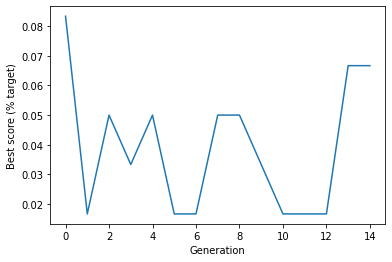

In [4]:
# By adding more goals, the Genetic Algorithm does not have enough time to converge to the optimal solution.
# As a result, we increase the value of maximum generations so that our algorithm has more time to converge.

# Set general parameters
population_size = 100
maximum_generation = 10
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp1 = 0.1 # nA
goal1 = 1.9999999999984794
stim_amp2 = 0.3 # nA
goal2 = 1.0999999999985306
stim_amp3 = 0.5 # nA
goal3 = 0.899999999998542
stim_amp4 = 0.9 # nA
goal4 = 0.6999999999985533
stim_amp5 = 1.1 # nA
goal5 = 0.599999999998559
stim_amp6 = 1.6 # nA
goal6 = 0.4999999999985647


# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3, goal4, stim_amp4, goal5, stim_amp5, goal6, stim_amp6)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.6f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2, goal3, stim_amp3, goal4, stim_amp4, goal5, stim_amp5, goal6, stim_amp6)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.6f (gna = %.4f, gk = %.4f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

#### --> Conclusions about our ideas:

- Constraining the starting population to g_min and g_max which are close to our target:

This facilitated the convergence, and allowed to find solutions which were much closer to the target that we aimed for.  However, when working with genetic algorithms, one does not systematically know what values they are trying to converge to and constraining the initial pouplation to specific ranges of values defeats the purpose of such optimization algorithms.

- Increasing the initial population:

When starting with an initial population of 50, the "genetic component" of the individuals was not diverse enough to explore solutions which were close to our target values.  By increasing this pouplation size to 100, we were able to increase the search space, and our genetic algorithm converged towards acceptable values (gna = 0.2567, and gk= 0.0925, which is close to the target values, gna = 0.25 and gk = 0.1)

- Increasing the number of generations:

We also tried to increase the number of generations, and this did not help constrain our problems more.  Indeed, by running for more generation, we keep exploring the search space randomly (the values evolve at a higher pace).  As a result, the solutions encountered have diverse conductances, which are not near the target conductances.  Increasing the number of generations, only increases this "random search", and does not seem to converge towards the target conductances, because the GA encounters adequate solutions each time.

- Increasing the number of datapoints we are giving it:

We tried to increase the number of datapoints and thus goals that our objective function used.  Indeed, by giving it more datapoints, we thought that the GA would be more constrained as it was given more conditions to fit to.  In terms implementation, the solution does still seem to fluctuate greatly and not converge as easily to our target conductances.

- A mix of these ideas:

We then concluded that to constrain our genetic algorithm more, we first increased the population size to 100 to have a wider "search space".  We then also increased the number of generations so that our GA could search for a longer period and have time to converge to the target values which we are hoping to reach.  Then, to constrain our problem further more, we introduced 6 datapoints so that our solution could approach more closely the target one.

When running this GA, our final values obtained were closer to the target value we were aiming for: 
gna = 0.2520, gk = 0.1294 (compared to gna = 0.25 and gk = 0.1)